In [1]:
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np 
import seaborn as sns 
import pickle 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#Settings for the notebook
engine='_gpt-4'
HUE_ORDER=['in paper', 'non-isolated', 'isolated']
HUE_COLOR=[sns.color_palette('colorblind')[2], 
           sns.color_palette('colorblind')[8], 
           sns.color_palette('colorblind')[3]]
#Font
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.usetex"] = True

#Dictionary for adapting colors 
color_dic={'b': sns.color_palette('colorblind')[0],
                  'g': sns.color_palette('colorblind')[2],
                  'y': sns.color_palette('colorblind')[8],
                  'r': sns.color_palette('colorblind')[3],
                  'k': sns.color_palette('colorblind')[7]
                  }

#Load files for generating the figures
with open('../data/graphs_v3.pickle', 'rb') as handle:
    graphs = pickle.load(handle)

with open('../data/graphs_random_v2.pickle', 'rb') as handle:
    graphs_random = pickle.load(handle)

results_graph=pd.read_csv('../data/results_graph_v3.csv', index_col=0)
results_graph_random=pd.read_csv('../data/results_graph_random_v2.csv', index_col=0)

/var/folders/kq/bwvwl1hd4g12lmk871x7q_br0000gn/T/ipykernel_16016/120336131.py:30: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  graphs = pickle.load(handle)
/var/folders/kq/bwvwl1hd4g12lmk871x7q_br0000gn/T/ipykernel_16016/120336131.py:33: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world u

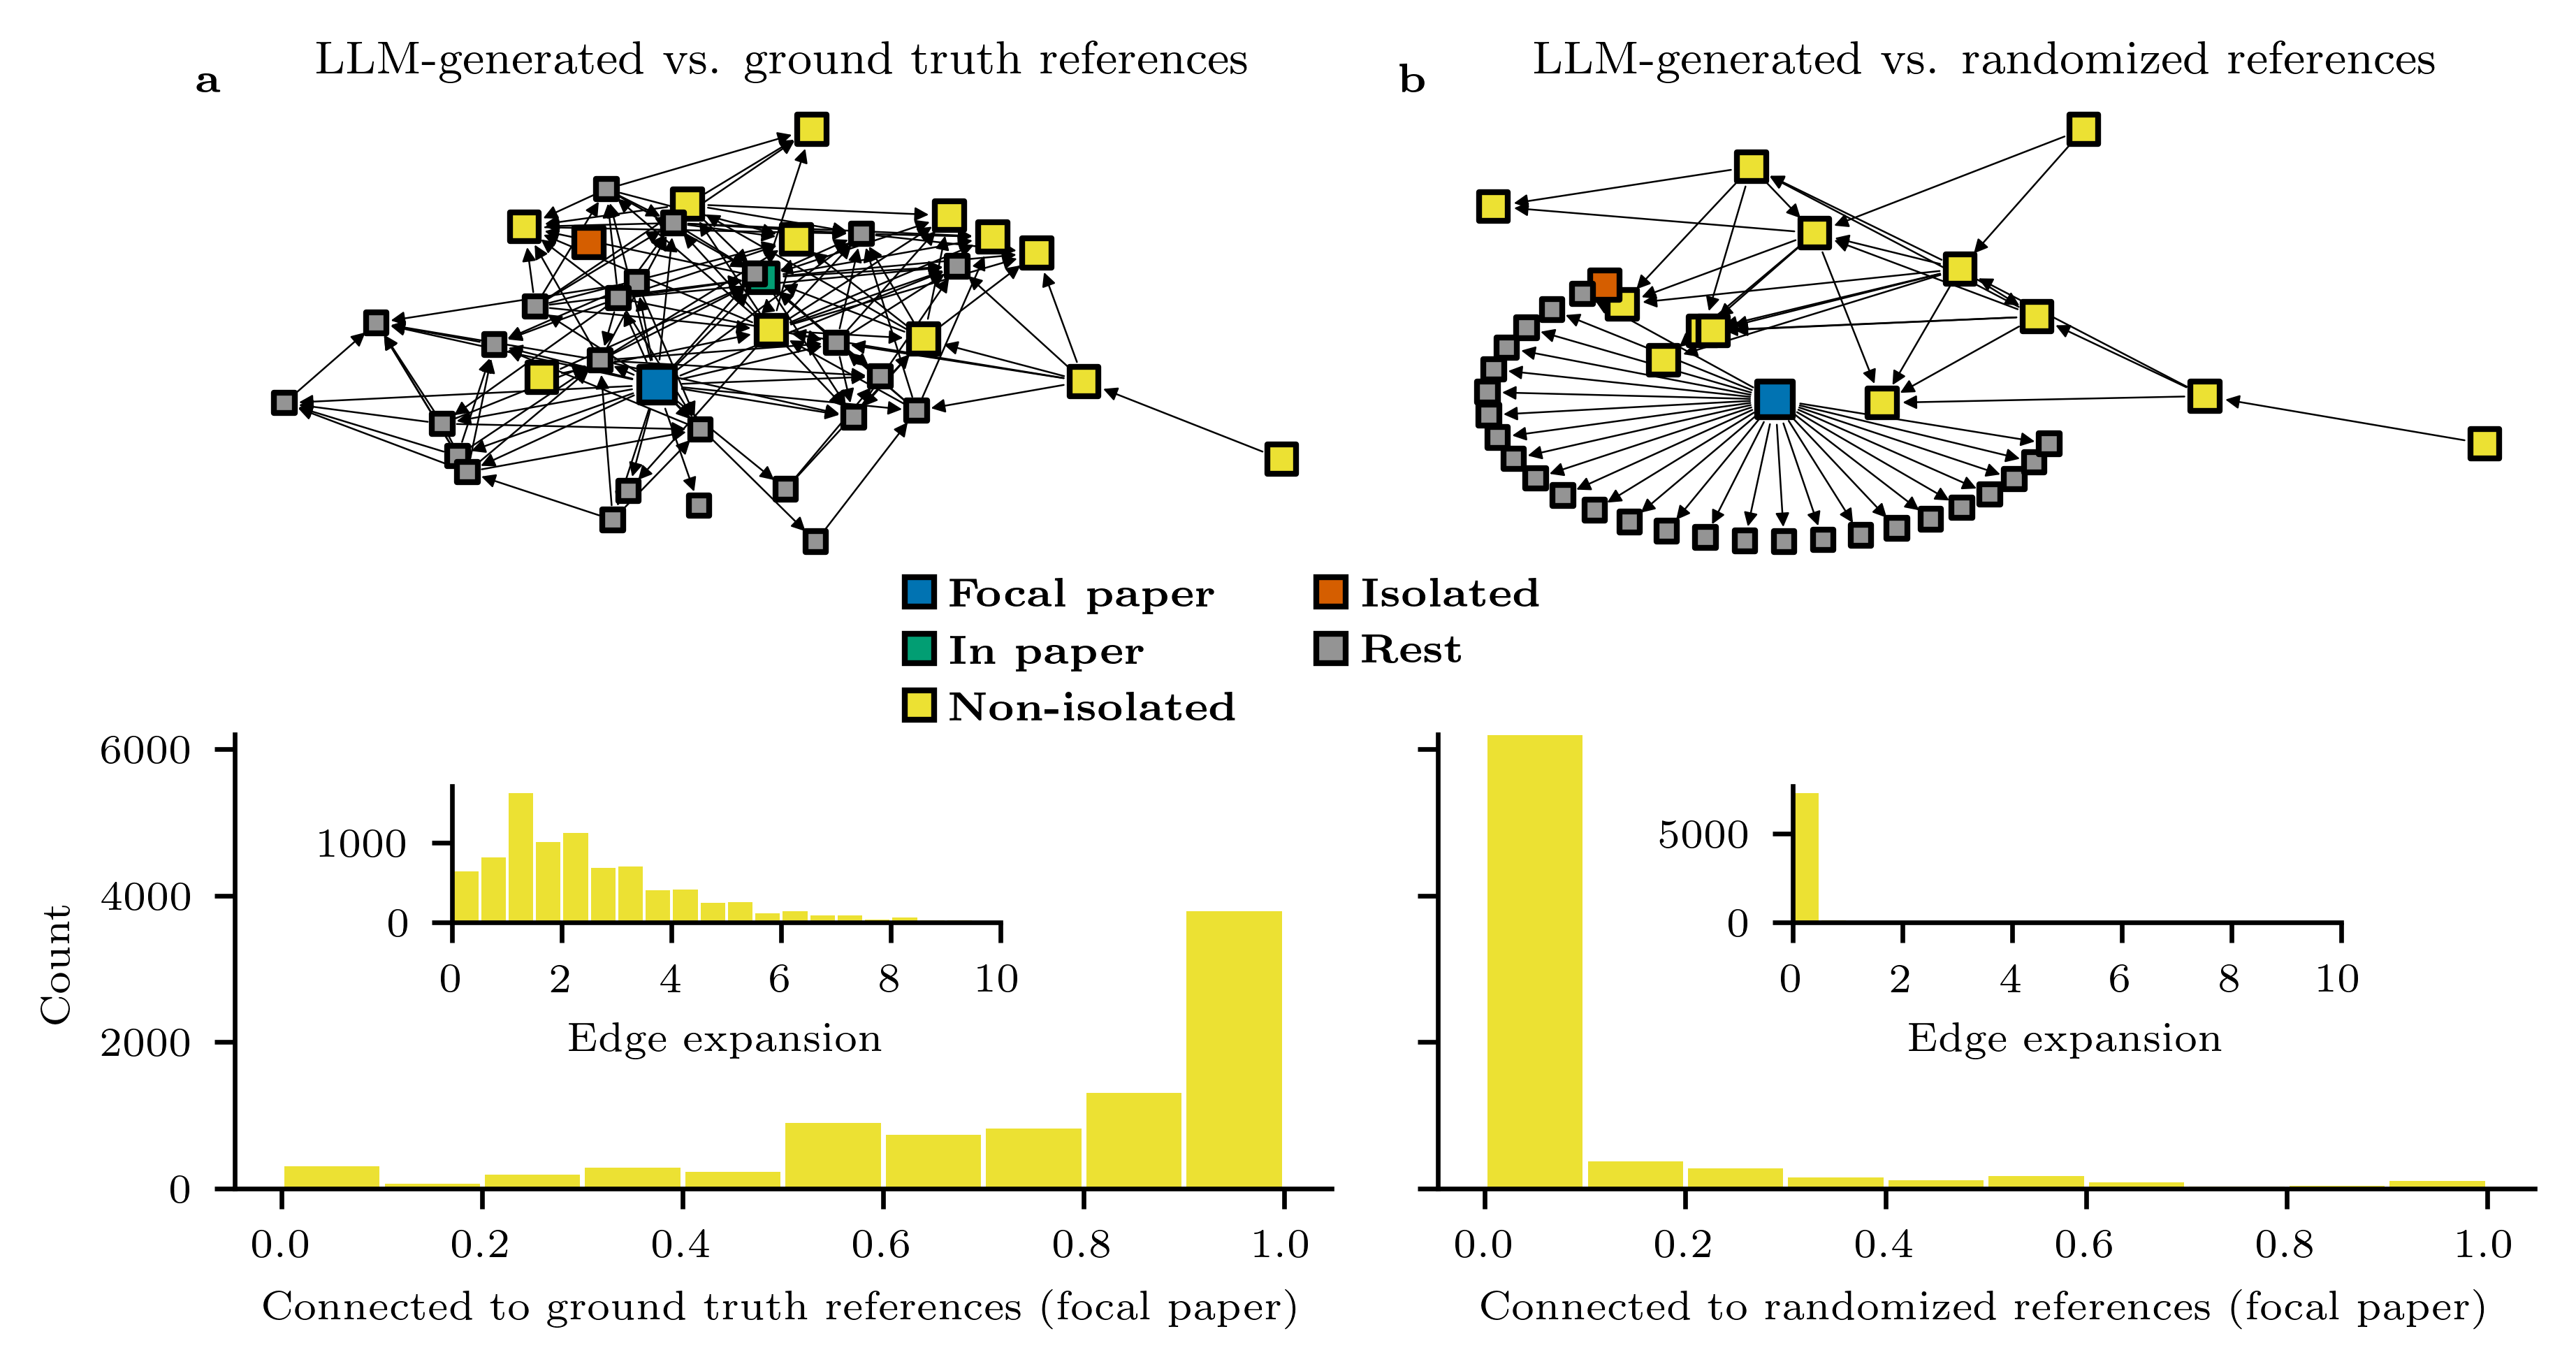

In [2]:
fig, ax = plt.subplot_mosaic(
                            [
                            ['A', '.', 'C',],
                            ['.', '.', '.',],
                            ['B','.', 'D'],
                            ],
                            figsize=(7.08,6.69/2),
                            gridspec_kw = {'width_ratios':[1, -0.15 , 1],'height_ratios': [1, 0.1, 1]},
                            dpi = 600
                            )

plt.rcParams["font.family"] = "Arial"
plt.rcParams['legend.title_fontsize'] = 7
plt.rcParams['text.usetex'] = True

#Add a title to panel A
ax['A'].set_title(r'LLM-generated vs. ground truth references', fontsize=8)

#Add a title to panel C
ax['C'].set_title(r'LLM-generated vs. randomized references', fontsize=8)

# annotations
annotations = {
    'A': r'\textbf{a}',
    'B': '',
    'C': r'\textbf{b}',
    'D': ''
}
 
# Annotate each subplot
for key, axis in ax.items():
    axis.text(-0.035, 1.10, annotations[key], transform=axis.transAxes,
            fontsize=7, fontweight='bold', va='top', ha='left')
    
#For each axis in ax set the fontsize of the x and y labels to 8
for key, axis in ax.items():
    axis.tick_params(axis='both', which='major', labelsize=7)
    axis.tick_params(axis='both', which='minor', labelsize=7)
    axis.set_xlabel(axis.get_xlabel(), fontsize=7)
    axis.set_ylabel(axis.get_ylabel(), fontsize=7)

""" 
Panel A: Ground truth graphs
"""

#Choose the focal paper to be displayed and extract its citation graph
paper=2151817970
dic=graphs[paper]
G=nx.DiGraph()
G.add_nodes_from(dic['nodes'])
G.add_edges_from(dic['edges'])

nx.draw(G, 
        nodelist=dic['nodes'], 
        pos=nx.kamada_kawai_layout(G), 
        node_color=dic['node_color'], 
        edgecolors='black',
        arrowsize=5, 
        width=0.3, 
        alpha=1, 
        node_size=[0.25*x for x in dic['node_size']],
        node_shape='s',
        ax=ax['A']
        )



#Add a legend to the plot
markersize=5
legend_elements = [
        Line2D([0], [0], marker='s', color='w', label=r'\textbf{Focal paper}', markerfacecolor=color_dic['b'], 
               markeredgecolor='black', 
               markersize=markersize, alpha=1), 
        Line2D([0], [0], marker='s', color='w', label=r'\textbf{In paper}', markerfacecolor=color_dic['g'], 
               markeredgecolor='black', 
               markersize=markersize, alpha=1),
        Line2D([0], [0], marker='s', color='w', label=r'\textbf{Non-isolated}', markerfacecolor=color_dic['y'], 
               markeredgecolor='black', 
               markersize=markersize, alpha=1),
        Line2D([0], [0], marker='s', color='w', label=r'\textbf{Isolated}', markerfacecolor=color_dic['r'], 
               markeredgecolor='black', 
               markersize=markersize, alpha=1),
        Line2D([0], [0], marker='s', color='w', label=r'\textbf{Rest}', markerfacecolor=color_dic['k'],
                markeredgecolor='black', 
                markersize=markersize, alpha=1),
    ]

#Set fontsize of legend
ax['A'].legend(handles=legend_elements,
                loc=(0.6, -0.4),
                frameon=False,
                handlelength=0.5,
                handletextpad=0.5,
                ncol=2,  
                prop={'size': 7}
                )

ax['A'].set_axis_off()

#Set margins to 0 to avoid whitespace
ax['A'].margins(x=0, y=0)

#Remove xticks and yticks
ax['A'].set_xticks([])
ax['A'].set_yticks([])

#Despine panel A completely
sns.despine(ax=ax['A'], left=True, bottom=True)

"""
Panel B: Connectivity of LLM-generated references to ground truth references
"""

mask=(results_graph['edge_density_bool'].isna())
sns.histplot(results_graph['edge_density_bool'][~mask], 
             bins=10, 
             label=r'\textbf{Non-isolated}', 
             edgecolor=None,
             legend=None,
             color=sns.color_palette('colorblind')[8], 
             shrink=0.95,
             alpha=1,
             ax=ax['B'],
             )

#Set x-label
ax['B'].set_xlabel('Connected to ground truth references (focal paper)')

#Set y-label
ax['B'].set_ylabel('Count')

#Remove axis on top and right 
ax['B'].spines['right'].set_visible(False)
ax['B'].spines['top'].set_visible(False)

#Set ylim 
ax['B'].set_ylim(0, 6200)

inset_ax = inset_axes(ax['B'], 
                      width="100%", height="100%", 
                      bbox_to_anchor=(0.225, 0.65, 0.5, 0.3), 
                      bbox_transform=ax['B'].transAxes)

#Plot a histogram of the edge expansion per focal paper  
mask=(results_graph['edge_expansion'].isna())
sns.histplot(results_graph['edge_expansion'][~mask], 
             label='non-isolated predictions',
             binwidth=0.5,
             color=sns.color_palette('colorblind')[8], 
             alpha=1,
             edgecolor=None,
             shrink=0.9,
             legend=None,
             ax=inset_ax,
             )     

#Remove y-axis label
inset_ax.set_ylabel('')

#Set x-axis label with smaller fontsize
inset_ax.set_xlabel('Edge expansion', fontsize=7)

#Set x-axis ticks
inset_ax.set_xticks(np.arange(0, 12, 2))
#Set x-lim
inset_ax.set_xlim(0, 10)
#Set y-axis ticks
#inset_ax.set_yticks(np.arange(0, 40, 10))
#Set fontsize of xticks 
plt.setp(inset_ax.get_xticklabels(), fontsize=7)
plt.setp(inset_ax.get_yticklabels(), fontsize=7)

#Remove axis on top and right 
inset_ax.spines['right'].set_visible(False)
inset_ax.spines['top'].set_visible(False)

"""
Panel C: reshuffled ground truth references 
"""

#Choose the focal paper to be displayed and extract its citation graph
paper=2151817970
dic=graphs_random[paper]
G=nx.DiGraph()
G.add_nodes_from(dic['nodes'])
G.add_edges_from(dic['edges'])

nx.draw(G, 
        nodelist=dic['nodes'], 
        pos=nx.kamada_kawai_layout(G), 
        node_color=dic['node_color'], 
        edgecolors='black',
        arrowsize=5, 
        width=0.3, 
        alpha=1, 
        node_size=[0.25*x for x in dic['node_size']],
        node_shape='s',
        ax=ax['C']
        )

ax['C'].set_axis_off()

#Set margins to 0 to avoid whitespace
ax['C'].margins(x=0, y=0)

#Despine figure
#sns.despine(fig, left=True, bottom=True)
#Remove xticks and yticks
ax['C'].set_xticks([])
ax['C'].set_yticks([])

"""
Panel D: Connectivity of LLM-generated references to randomly reshuffled ground truth references
"""

mask=(results_graph_random['edge_density_bool'].isna())
sns.histplot(results_graph_random['edge_density_bool'][~mask], 
             bins=10, 
             label=r'\textbf{Non-isolated}', 
             edgecolor=None,
             legend=None,
             color=sns.color_palette('colorblind')[8], 
             shrink=0.95,
             alpha=1,
             ax=ax['D'],
             )

#Set x-label
ax['D'].set_xlabel('Connected to randomized references (focal paper)')

#Set y-label
ax['D'].set_ylabel('')

#Remove y-tick labels 
ax['D'].set_yticklabels([])

#Set ylim 
ax['D'].set_ylim(0, 6200)

#Remove axis on top and right 
ax['D'].spines['right'].set_visible(False)
ax['D'].spines['top'].set_visible(False)

inset_ax = inset_axes(ax['D'], 
                      width="100%", height="100%", 
                      bbox_to_anchor=(0.35, 0.65, 0.5, 0.3), 
                      bbox_transform=ax['D'].transAxes)

#Plot a histogram of the edge expansion per focal paper  
mask=(results_graph_random['edge_expansion'].isna())
sns.histplot(results_graph_random['edge_expansion'][~mask], 
             label='non-isolated predictions',
             binwidth=0.5,
             color=sns.color_palette('colorblind')[8], 
             alpha=1,
             edgecolor=None,
             shrink=0.9,
             legend=None,
             ax=inset_ax,
             )     

#Remove y-axis label
inset_ax.set_ylabel('')

#Set x-axis label with smaller fontsize
inset_ax.set_xlabel('Edge expansion', fontsize=7)

#Set x-axis ticks
inset_ax.set_xticks(np.arange(0, 12, 2))
#Set x-lim
inset_ax.set_xlim(0, 10)
#Set y-axis ticks
#inset_ax.set_yticks(np.arange(0, 40, 10))
#Set fontsize of xticks 
plt.setp(inset_ax.get_xticklabels(), fontsize=7)
plt.setp(inset_ax.get_yticklabels(), fontsize=7)

#Remove axis on top and right 
inset_ax.spines['right'].set_visible(False)
inset_ax.spines['top'].set_visible(False)

plt.show()